In [1]:
print("hello naman")

hello naman


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9kVeIFBETv8wDX9gfKwx")
project = rf.workspace("vit-zihk6").project("accident-detection-using-yolov8-ujxkn")
version = project.version(1)
dataset = version.download("coco")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Detection-using-Yolov8-1 in coco:: 100%|██████████| 2307/2307 [00:00<00:00, 3726.16it/s]


In [3]:
!pip install mediapipe
!pip install mediapipe-model-maker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [5]:
from mediapipe_model_maker import object_detector
from google.colab import files
import os
import json
import tensorflow as tf
from mediapipe_model_maker.python.core.utils import file_util
from mediapipe_model_maker.python.core.utils import model_util


from mediapipe_model_maker.python.vision.core import image_utils
from mediapipe_model_maker.python.vision.core import test_utils
from mediapipe_model_maker.python.vision.object_detector import dataset
from mediapipe.tasks.python.test import test_utils as tasks_test_utils


In [6]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [7]:
import os

# Define file paths
source_path = "/content/train/_annotations.coco.json"
destination_path = "/content/train/labels.json"

# Rename the file
os.rename(source_path, destination_path)

print(f"File renamed from '{source_path}' to '{destination_path}'")

# Define file paths
source_path = "/content/valid/_annotations.coco.json"
destination_path = "/content/valid/labels.json"

# Rename the file
os.rename(source_path, destination_path)
dir_path = "/content/exported_model"

# Create the directory
os.makedirs(dir_path, exist_ok=True)
print(f"File renamed from '{source_path}' to '{destination_path}'")

File renamed from '/content/train/_annotations.coco.json' to '/content/train/labels.json'
File renamed from '/content/valid/_annotations.coco.json' to '/content/valid/labels.json'


In [12]:
train_dataset_path = "/content/train"
validation_dataset_path = "/content/valid"

In [19]:
with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
  labels_json = json.load(f)
for category_item in labels_json["categories"]:
  print(f"{category_item['id']}: {category_item['name']}")

1: car-bike-person
2: bike
3: bike_bike_accident
4: bike_person_accident
5: car
6: car_bike_accident
7: car_car_accident
8: car_object_accident
9: person


In [14]:
import os
import shutil

# Define source and destination directories
source_dir = "/content/train"
dest_dir = "/content/train/images"

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Iterate through files in the source directory
for file_name in os.listdir(source_dir):
    if file_name.endswith(".jpg"):  # Check if the file is a .jpg
        source_file = os.path.join(source_dir, file_name)
        dest_file = os.path.join(dest_dir, file_name)

        # Move the file
        shutil.move(source_file, dest_file)

print(f"All .jpg images moved to '{dest_dir}'.")


All .jpg images moved to '/content/train/images'.


In [15]:
import os
import shutil

# Define source and destination directories
source_dir = "/content/valid"
dest_dir = "/content/valid/images"

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Iterate through files in the source directory
for file_name in os.listdir(source_dir):
    if file_name.endswith(".jpg"):  # Check if the file is a .jpg
        source_file = os.path.join(source_dir, file_name)
        dest_file = os.path.join(dest_dir, file_name)

        # Move the file
        shutil.move(source_file, dest_file)

print(f"All .jpg images moved to '{dest_dir}'.")


All .jpg images moved to '/content/valid/images'.


In [17]:
import json
import os

def update_label_ids(labels_json_path):
    """Updates category IDs in a COCO JSON file to start from 1.

    Args:
        labels_json_path: Path to the COCO JSON file.
    """
    with open(labels_json_path, "r") as f:
        labels_json = json.load(f)

    # Increment category IDs by 1
    for category in labels_json["categories"]:
        category["id"] += 1

    # Update annotation IDs to reflect the new category IDs
    for annotation in labels_json["annotations"]:
        annotation["category_id"] += 1

    # Write the updated JSON back to the file
    with open(labels_json_path, "w") as f:
        json.dump(labels_json, f, indent=2)

# Example usage:
train_dataset_path = "/content/train" # Replace with your train dataset path
labels_json_path = os.path.join(train_dataset_path, "labels.json")
update_label_ids(labels_json_path)

validation_dataset_path = "/content/valid" # Replace with your validation dataset path
labels_json_path = os.path.join(validation_dataset_path, "labels.json")
update_label_ids(labels_json_path)

In [10]:
import matplotlib.pyplot as plt
from matplotlib import patches, text, patheffects
from collections import defaultdict
import math

def draw_outline(obj):
  obj.set_path_effects([patheffects.Stroke(linewidth=4,  foreground='black'), patheffects.Normal()])
def draw_box(ax, bb):
  patch = ax.add_patch(patches.Rectangle((bb[0],bb[1]), bb[2], bb[3], fill=False, edgecolor='red', lw=2))
  draw_outline(patch)
def draw_text(ax, bb, txt, disp):
  text = ax.text(bb[0],(bb[1]-disp),txt,verticalalignment='top'
  ,color='white',fontsize=10,weight='bold')
  draw_outline(text)
def draw_bbox(ax, annotations_list, id_to_label, image_shape):
  for annotation in annotations_list:
    cat_id = annotation["category_id"]
    bbox = annotation["bbox"]
    draw_box(ax, bbox)
    draw_text(ax, bbox, id_to_label[cat_id], image_shape[0] * 0.05)
def visualize(dataset_folder, max_examples=None):
  with open(os.path.join(dataset_folder, "labels.json"), "r") as f:
    labels_json = json.load(f)
  images = labels_json["images"]
  cat_id_to_label = {item["id"]:item["name"] for item in labels_json["categories"]}
  image_annots = defaultdict(list)
  for annotation_obj in labels_json["annotations"]:
    image_id = annotation_obj["image_id"]
    image_annots[image_id].append(annotation_obj)

  if max_examples is None:
    max_examples = len(image_annots.items())
  n_rows = math.ceil(max_examples / 3)
  fig, axs = plt.subplots(n_rows, 3, figsize=(24, n_rows*8)) # 3 columns(2nd index), 8x8 for each image
  for ind, (image_id, annotations_list) in enumerate(list(image_annots.items())[:max_examples]):
    ax = axs[ind//3, ind%3]
    img = plt.imread(os.path.join(dataset_folder, "images", images[image_id]["file_name"]))
    ax.imshow(img)
    draw_bbox(ax, annotations_list, cat_id_to_label, img.shape)
  plt.show()

visualize(train_dataset_path, 9)

FileNotFoundError: [Errno 2] No such file or directory: '/content/train/images/img_149_jpg.rf.a970b47f00b2bfcbad916423d93b5818.jpg'

In [18]:
train_data = object_detector.Dataset.from_coco_folder(train_dataset_path, cache_dir="/content/tmp/od_data/train")
validation_data = object_detector.Dataset.from_coco_folder(validation_dataset_path, cache_dir="/content/tmp/od_data/validation")
print("train_data size: ", train_data.size)
print("validation_data size: ", validation_data.size)

train_data size:  1638
validation_data size:  557


In [20]:
epochs = 30


In [21]:
spec = object_detector.SupportedModels.MOBILENET_MULTI_AVG_I384
hparams = object_detector.HParams(
    batch_size=8,
    learning_rate=0.3,
    epochs= epochs,
    export_dir='/content/exported_model'
    )
options = object_detector.ObjectDetectorOptions(
    supported_model=spec,
    hparams=hparams
)

In [22]:
model = object_detector.ObjectDetector.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options)

Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.


Model: "retina_net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net (MobileNet)      {'2': (None, 96, 96, 32   3704416   
                             ),                                  
                              '3': (None, 48, 48, 64             
                             ),                                  
                              '4': (None, 24, 24, 16             
                             0),                                 
                              '5': (None, 12, 12, 19             
                             2),                                 
                              '6': (None, 1, 1, 1280             
                             )}                                  
                                                                 
 fpn (FPN)                   {'5': (None, 12, 12, 12   144928    
                             8),                  

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


204/204 [==============================] - 118s 332ms/step - total_loss: 2.9537 - cls_loss: 2.6196 - box_loss: 0.0055 - model_loss: 2.8930 - val_total_loss: 1.0604 - val_cls_loss: 0.7914 - val_box_loss: 0.0042 - val_model_loss: 0.9997
Epoch 2/30
204/204 [==============================] - 57s 278ms/step - total_loss: 0.8502 - cls_loss: 0.5982 - box_loss: 0.0038 - model_loss: 0.7895 - val_total_loss: 0.7459 - val_cls_loss: 0.5024 - val_box_loss: 0.0037 - val_model_loss: 0.6852
Epoch 3/30
204/204 [==============================] - 60s 296ms/step - total_loss: 0.6440 - cls_loss: 0.4283 - box_loss: 0.0031 - model_loss: 0.5833 - val_total_loss: 0.6733 - val_cls_loss: 0.4326 - val_box_loss: 0.0036 - val_model_loss: 0.6125
Epoch 4/30
204/204 [==============================] - 57s 281ms/step - total_loss: 0.5295 - cls_loss: 0.3421 - box_loss: 0.0025 - model_loss: 0.4688 - val_total_loss: 0.6668 - val_cls_loss: 0.4178 - val_box_loss: 0.0038 - val_model_loss: 0.6061
Epoch 5/30
204/204 [==========

In [23]:
loss, coco_metrics = model.evaluate(validation_data, batch_size=4)
print(f"Validation loss: {loss}")
print(f"Validation coco metrics: {coco_metrics}")

140/140 [==============================] - 12s 73ms/step - total_loss: 0.8254 - cls_loss: 0.5738 - box_loss: 0.0038 - model_loss: 0.7642
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.09s).
Accumulating evaluation results...
DONE (t=0.23s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.230
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.197
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.229
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.304
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.353
 Average Recall     (AR) @

In [24]:
model.export_model()
!ls exported_model
files.download('/content/exported_model/model.tflite')

Exporting a floating point model


Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.


float_ckpt.data-00000-of-00001	float_ckpt.index  metadata.json  model.tflite


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
qat_hparams = object_detector.QATHParams(learning_rate=0.3, batch_size=4, epochs=10, decay_steps=6, decay_rate=0.96)
model.quantization_aware_training(train_data, validation_data, qat_hparams=qat_hparams)
qat_loss, qat_coco_metrics = model.evaluate(validation_data)
print(f"QAT validation loss: {qat_loss}")
print(f"QAT validation coco metrics: {qat_coco_metrics}")

Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.


Epoch 1/10


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


409/409 [==============================] - 320s 622ms/step - total_loss: 1.5078 - cls_loss: 0.9429 - box_loss: 0.0113 - model_loss: 1.5078 - val_total_loss: 1.2960 - val_cls_loss: 0.8018 - val_box_loss: 0.0099 - val_model_loss: 1.2960
Epoch 2/10
409/409 [==============================] - 223s 544ms/step - total_loss: 1.2382 - cls_loss: 0.7760 - box_loss: 0.0092 - model_loss: 1.2382 - val_total_loss: 1.2848 - val_cls_loss: 0.7953 - val_box_loss: 0.0098 - val_model_loss: 1.2848
Epoch 3/10
409/409 [==============================] - 221s 541ms/step - total_loss: 1.2589 - cls_loss: 0.7945 - box_loss: 0.0093 - model_loss: 1.2589 - val_total_loss: 1.3063 - val_cls_loss: 0.8164 - val_box_loss: 0.0098 - val_model_loss: 1.3063
Epoch 4/10
409/409 [==============================] - 242s 592ms/step - total_loss: 1.2814 - cls_loss: 0.8124 - box_loss: 0.0094 - model_loss: 1.2814 - val_total_loss: 1.3157 - val_cls_loss: 0.8221 - val_box_loss: 0.0099 - val_model_loss: 1.3157
Epoch 5/10
409/409 [=======

In [26]:
new_qat_hparams = object_detector.QATHParams(learning_rate=0.9, batch_size=4, epochs=15, decay_steps=5, decay_rate=0.96)
model.restore_float_ckpt()
model.quantization_aware_training(train_data, validation_data, qat_hparams=new_qat_hparams)
qat_loss, qat_coco_metrics = model.evaluate(validation_data)
print(f"QAT validation loss: {qat_loss}")
print(f"QAT validation coco metrics: {qat_coco_metrics}")

Using existing files at /tmp/model_maker/object_detector/mobilenetmultiavg_i384
Model: "retina_net_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_2 (MobileNet)    {'2': (None, 96, 96, 32   3704416   
                             ),                                  
                              '3': (None, 48, 48, 64             
                             ),                                  
                              '4': (None, 24, 24, 16             
                             0),                                 
                              '5': (None, 12, 12, 19             
                             2),                                 
                              '6': (None, 1, 1, 1280             
                             )}                                  
                                                                 
 fpn_2 (FPN)                 {'5':

409/409 [==============================] - 295s 575ms/step - total_loss: 1.4977 - cls_loss: 0.9298 - box_loss: 0.0114 - model_loss: 1.4977 - val_total_loss: 1.5252 - val_cls_loss: 0.8844 - val_box_loss: 0.0128 - val_model_loss: 1.5252
Epoch 2/15
409/409 [==============================] - 220s 538ms/step - total_loss: 1.3161 - cls_loss: 0.8130 - box_loss: 0.0101 - model_loss: 1.3161 - val_total_loss: 1.5140 - val_cls_loss: 0.8859 - val_box_loss: 0.0126 - val_model_loss: 1.5140
Epoch 3/15
409/409 [==============================] - 221s 540ms/step - total_loss: 1.3504 - cls_loss: 0.8359 - box_loss: 0.0103 - model_loss: 1.3504 - val_total_loss: 1.4789 - val_cls_loss: 0.8952 - val_box_loss: 0.0117 - val_model_loss: 1.4789
Epoch 4/15
409/409 [==============================] - 241s 590ms/step - total_loss: 1.3757 - cls_loss: 0.8563 - box_loss: 0.0104 - model_loss: 1.3757 - val_total_loss: 1.4949 - val_cls_loss: 0.9153 - val_box_loss: 0.0116 - val_model_loss: 1.4949
Epoch 5/15
409/409 [=======

In [27]:
model.export_model('model_int8_qat.tflite')
!ls -lh exported_model
files.download('/content/exported_model/model_int8_qat.tflite')

Exporting a qat int8 model


Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.


total 38M
-rw-r--r-- 1 root root  16M Dec  2 08:45 float_ckpt.data-00000-of-00001
-rw-r--r-- 1 root root  32K Dec  2 08:45 float_ckpt.index
-rw-r--r-- 1 root root 5.4M Dec  2 12:02 metadata.json
-rw-r--r-- 1 root root 4.0M Dec  2 12:02 model_int8_qat.tflite
-rw-r--r-- 1 root root  13M Dec  2 08:56 model.tflite


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from mediapipe_model_maker import quantization

In [29]:
quantization_config = quantization.QuantizationConfig.for_float16()

In [30]:
model.restore_float_ckpt()
model.export_model(model_name="model_fp16.tflite", quantization_config=quantization_config)
!ls -lh exported_model
files.download('/content/exported_model/model_fp16.tflite')

Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.


Using existing files at /tmp/model_maker/object_detector/mobilenetmultiavg_i384
Model: "retina_net_model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_4 (MobileNet)    {'2': (None, 96, 96, 32   3704416   
                             ),                                  
                              '3': (None, 48, 48, 64             
                             ),                                  
                              '4': (None, 24, 24, 16             
                             0),                                 
                              '5': (None, 12, 12, 19             
                             2),                                 
                              '6': (None, 1, 1, 1280             
                             )}                                  
                                                                 
 fpn_4 (FPN)                 {'5':

Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.


total 44M
-rw-r--r-- 1 root root  16M Dec  2 08:45 float_ckpt.data-00000-of-00001
-rw-r--r-- 1 root root  32K Dec  2 08:45 float_ckpt.index
-rw-r--r-- 1 root root 5.4M Dec  2 12:03 metadata.json
-rw-r--r-- 1 root root 6.7M Dec  2 12:03 model_fp16.tflite
-rw-r--r-- 1 root root 4.0M Dec  2 12:02 model_int8_qat.tflite
-rw-r--r-- 1 root root  13M Dec  2 08:56 model.tflite


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
#grab the vector of string class names
class_names = validation_data.label_names
print("order of class names --indicating index values (corresponding class index)")
print(class_names)
print("\n\n\n")

order of class names --indicating index values (corresponding class index)
['background', 'car-bike-person', 'bike', 'bike_bike_accident', 'bike_person_accident', 'car', 'car_bike_accident', 'car_car_accident', 'car_object_accident', 'person']






In [3]:
!pip install mediapipe
!pip install mediapipe-model-maker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [4]:
export_model_dir = "/content"

In [5]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

model_tflite_file = export_model_dir + "/model.tflite"
# STEP 2: Create an ObjectDetector object.
#base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
base_options = python.BaseOptions(model_asset_path=model_tflite_file)

options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

In [6]:
#We implemented some functions to visualize the object detection results. <br/> Run the following cell to activate the functions.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [8]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

MessageError: RangeError: Maximum call stack size exceeded.

In [11]:
IMAGE_FILE ='/content/1.png'

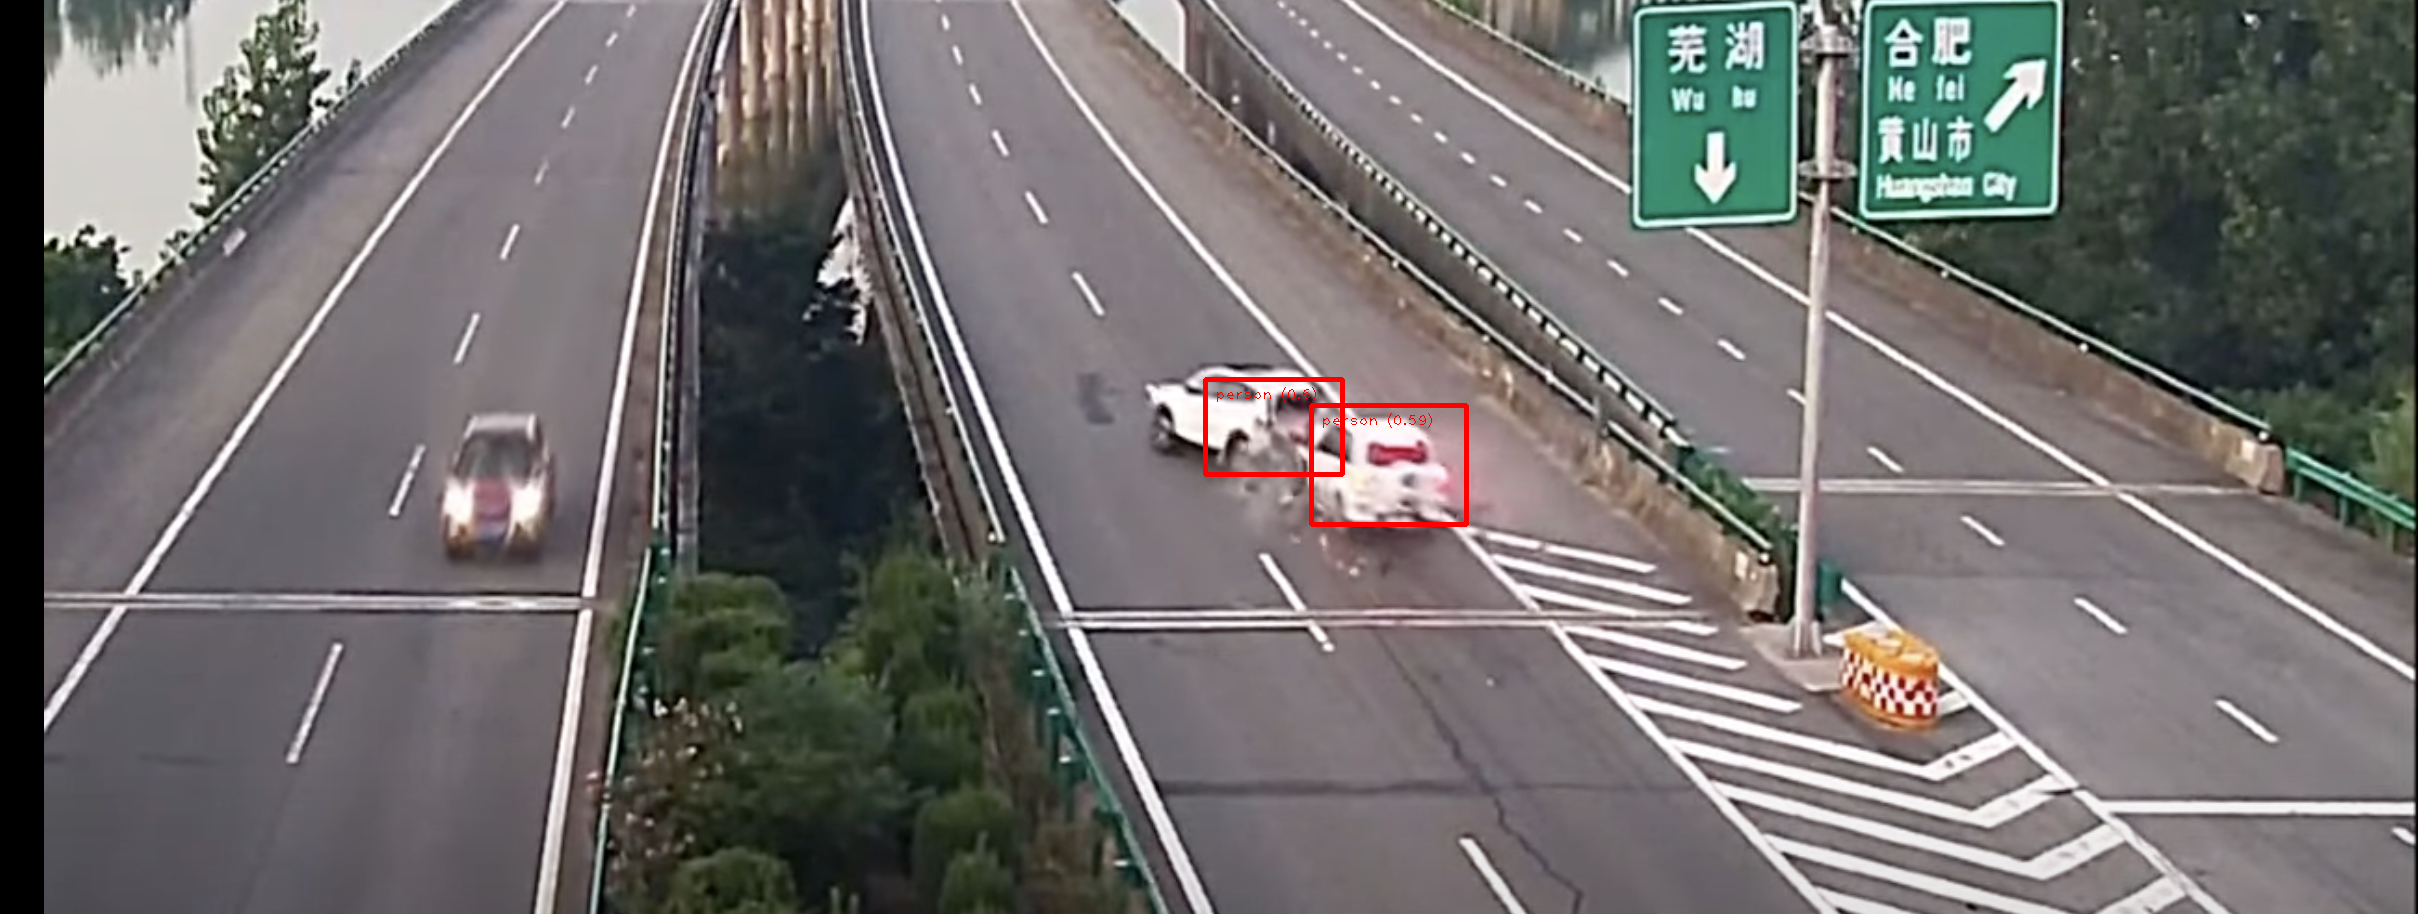

In [12]:
# STEP 1: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 2: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 3: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)